# Pre-class Assignment: Python Packages
# Day 4
# CMSE 202

## <p style="text-align: right;"> &#9989; Jack Cienkus</p>

## Goals for today's pre-class assignment

</p>

1. Remind yourself how to download indiviual files from the internet via the command line
1. Practice installing publicly-available Python packages

## Assignment instructions
**This assignment is due by 11:59 p.m. the day before class** and should be uploaded into the appropriate "Pre-class assignments" submission folder in the Desire2Learn website. 

----
# 1. Downloading individual files from the internet (revisting the `curl` command) 

In the in-class assignment you may need to download a few files from the internet, a quick and reliable way to do this is using `curl` on the command line!

Reflect back on what you learned previously in class or use the internet to answer the questions below:

&#9989; **Question 1:** What does the `curl` command do?

<font size=+3>&#9998;</font> `curl` can be used to download files from the internet via a URL.

&#9989; **Question 2:** There is a file called `US_Unemployment_Oct2012.csv` that can be accessed at the following location:

`https://raw.githubusercontent.com/wrobstory/vincent/master/examples/data/US_Unemployment_Oct2012.csv`

How would you use `curl` to download this file to your computer?

**Important**: Remember that by default `curl` will simply output the contents of the file to your screen. What command flag should you use to ensure that the remote file is actually saved as a file on your computer? If you don't remember, you might need to leverage the internet to remind yourself.

<font size=+3>&#9998;</font> To download this .csv file from the URL above, you would first need to create a new file (in my case, I'll name it "us_unemployment_oct2012.csv"), and then type the following into your terminal: `curl -o us_unemployment_oct2012.csv https://raw.githubusercontent.com/wrobstory/vincent/master/examples/data/US_Unemployment_Oct2012.csv`

&#9989; **Question 3**: Are there any other command line commands can be used to download files onto your computer from a remote location? There is another very common command out there besides `curl`, but your computer might not have it. Can you figure out what that command is? The MSU JupyerHub server has this command available. If you can figure out what it is, test it out with the file from the previous question!

<font size=+3>&#9998;</font> Another command you can use to download files is the `wget` command. This one is useful, because it's able to work in the background while you're logged off, and it doesn't require you to create a file beforehand to output remote file content to. 

----
# 2. Installing Third Party Packages

There is a lot of **awesome** code out there that is publicly available and accessible on the internet (you started to witness a bit of this when you were exploring repositories on GitHub). Part of this ecosystem of publicly available software tools is a bunch of really useful Python packages and libraries that we might not already have installed as part of the Anaconda Python distribution.

So, how do we go about installing new third party packages that aren't already a part of our Python installation?

If the package you want to use is available as a "conda" package or from the Python Package Index (PyPI), installation is generally pretty straight forward.

Let's test out installing a package using `conda` and a package using `pip`, which installs packages from PyPI.

### 2.1 Pip installation

There is a great package called [`cmocean`](http://matplotlib.org/cmocean/) (available [here](https://matplotlib.org/cmocean/)) that contains several colormaps that are commonly using for plotting oceanography data. One of the awesome things about the colormaps is that they are designed to be color-blind friendly, meaning that even if you're colorblind you can still extract information from the colormap.

**&#9989; Do This**:

**If you're doing this on your computer locally**, try installing the package by doing the following on the command line:

``` bash
pip install "cmocean[plots]"
```

**If you're doing this on the MSU JupyterHub**, you'll need to modify the command a bit in order to make sure you don't run into permission issues with the installation process. If you're not installing pip packages on your local machine or a machine you have root privileges for, you need to use the `--user` flag, like so:

``` bash
pip install --user "cmocean[plots]" # Make sure you include the quotation marks (") in your command
```
    
This not only installs the main cmocean module, but also installs the "plots" submodule, which is necessary to get some of the examples from the cmocean documentation page to work. When you run the command, you'll see that pip finds the packages and also checks if it should install or update any other packages at the same time. Once you've installed the package, you should be able to import it. Test it out in this notebook! Try making a plot using one of the new colormaps you have available.

**You also have to include `import cmocean.plots` rather than just using `import cmocean` if you try to run any of the examples that use "`cmocean.plots`".**



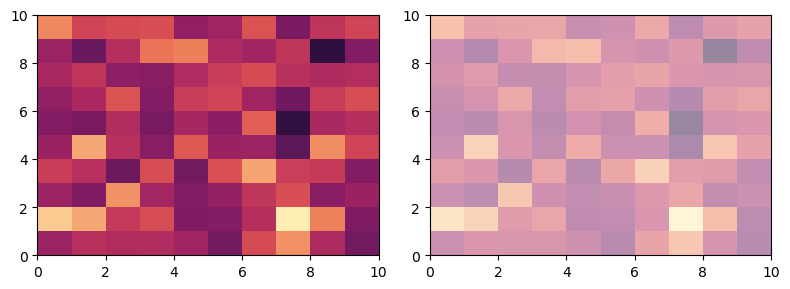

In [3]:
# Test out importing cmocean here.
# If you can, see if you can make a plot using one of the new colormaps.
# An easy option is to use some of the code provided on the cmocean website
import cmocean
import cmocean.cm as cmo
import matplotlib.pyplot as plt
import numpy as np
import random

fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(1, 2, 1)
Z = np.random.randn(10,10)
ax.pcolormesh(Z, cmap=cmo.matter)

ax = fig.add_subplot(1, 2, 2)
lightcmap = cmocean.tools.lighten(cmo.matter, 0.5)
ax.pcolormesh(Z, cmap=lightcmap)
fig.tight_layout()

### 2.2 Conda installation

While `pip` is one handy way to install Python packages when you're working within an Anaconda environment, you can also make use of the `conda` command. However, **the caveat to this is that you need to have permission to writing new files into your Python installation when using conda to install the package, which you do not have permission to on the MSU JupyterHub server**. If you've been only using JupyterHub for class at this point, that's totally OK, but you should still read about how to use `conda` for installing packages and then you can try to [install the same pacakge with pip instead](#pip-install).

#### A package for printing nicer looking tables
Occasionally there are times when you're looking at simple datasets in Python and it would be handy to be able to manipulate and visualize the data in simple ASCII formats without dealing with all of the Pandas dataframe overhead. Or perhaps you need to output the a data table in an HTML format so that you can render the table on the web.

**&#9989; Do This**: 
To achieve these sorts of tasks, you can install a package called `prettytable` using `conda` like so:

``` bash
conda install -c conda-forge prettytable
```

This uses conda to install the package by locating it on [conda-forge](https://conda-forge.org/), which is a community maintained set of conda packages. When you run the command, you'll see that conda finds the packages and also checks if it should update any other packages at the same time and will let you know everything it plans to do before you confirm that you want it to happen. Once you've installed the package, you should be able to import it. Some documentation for `prettytable` can be found here: [https://github.com/jazzband/prettytable](https://github.com/jazzband/prettytable)

If you were able to get `prettytable` installed, test it out and make sure it's working by trying to run some of the examples from the `README` file on the GitHub page linked above.

<a id="pip-install"></a>
**Important note:** If you're trying to do this on JupyterHub, rather than on your personal computer, you will get a error that you don't have permissions to install new packages. Luckily, you can install `prettytable` with pip as well!

To do so, try running this command:
``` bash
pip install --user prettytable
```
Try out one of the examples from the link above!

In [1]:
# Put your prettytable testing code here
import numpy as np
from prettytable import from_csv
with open(r"CMSE202/repositories/CMSE202-s25-turnin/US_Unemployment_Oct2012.csv") as fp:
    table = from_csv(fp)

table

State,Unemployment
AL,7.1
AK,6.8
AZ,8.1
AR,7.2
CA,10.1
CO,7.7
CT,8.4
DE,7.1
FL,8.2
GA,8.8


### 2.3 Updating a package you already have

**&#9989; Do This**: Run the following command, either in this notebook or in a terminal:

```bash
conda list
```

This should show you a list of all (or most of) the Python packages available to you. Scroll through the list and look for **NumPy**. The version you have is likely not complete updated to date with the current version! You can check the current releases [here](https://matplotlib.org/stable/users/release_notes). If your version _is_ fully up to date, you can move on to the next section.

To update a package, we can again use `pip`, specifically:

```bash
pip install --upgrade matplotlib
```

**&#9989; Do This**: Run the code above, either in this notebook or a terminal. At the end of this, you should have version the most recent version.

#### 2.3.1 Going back to older versions of packages

In rare, though not impossible, circumstances, you may need to install an *older* version of a package. This can happen when a package requires an older version of another package. (Again, rare, but not crazy rare). In this case, we still use `pip`, but now we specify the version, like so:

```bash
pip install matplotlib==3.7.1
```

**&#9989; Do This**: Run the code above, either in this notebook or a terminal. At the end of this, you should have version 3.7.1.

#### 2.3.2 Checking for outdated packages

Now that you've practiced updating a package, you can also check to see if any of your packages are out of date. To do this, you can use the following command:

```bash
pip list --outdated
```

This can be useful if you want to make sure you're always using the most up to date version of a package. Or, if you're working on a project with a collaborator, you can make sure you're both using the same version of a package, which can help avoid some headaches.

**&#9989; Do This**: Run the code above, either in this notebook or a terminal. At the end of this, you should have a list of packages that are out of date.

### 2.4 Using examples from new packages

The **most important** skill you can take away from this pre-class assignment is reading and using examples provided in the documentation. For this part, let's work with the `scikit-image` package. You can find the details for this page on its [webpage](https://scikit-image.org/). 


**&#9989; Do This**:
1. Navigate to the Gallery page. **NOTE:** Not all packages will have Galleries. For those packages, use the documentation. 
2. Go to the example **RGB to grayscale**.
3. Copy and paste the code provided in this example into the cell below and run it.

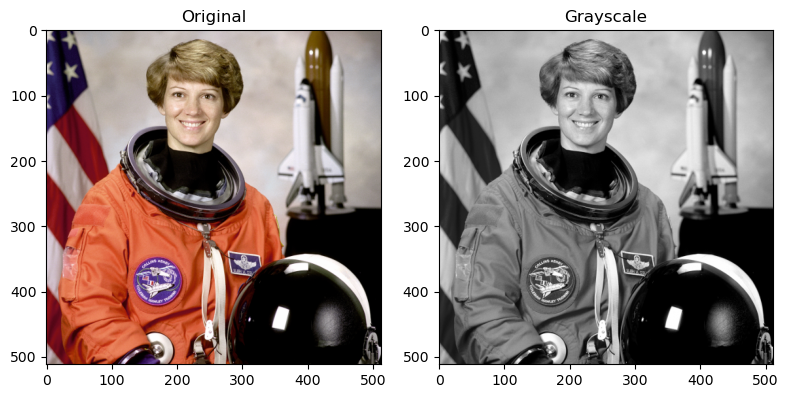

In [1]:
#Copy and paste the example code here
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

original = data.astronaut()
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

The reason why we did this is that we now have an example to build on. 

&#9989; **2.4.1:** Go back to the Gallery. You should see that some of the other examples use images other than the astronaut we just worked with. Using code from one of the other examples, modify the **RGB to grayscale** code so that it uses another image (I.e., not the astronaut image).

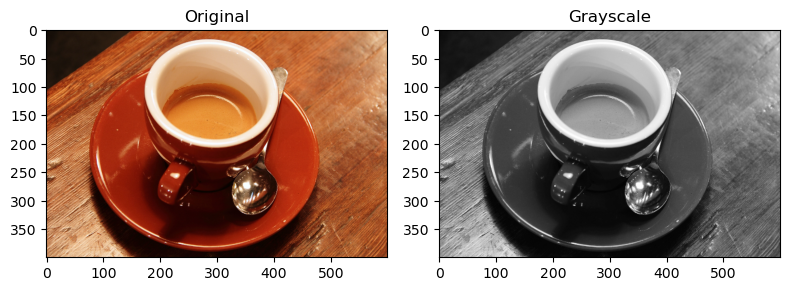

In [2]:
#Put your code here
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

original = data.coffee() # changed from astronaut to coffee
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

&#9989; **2.4.2:** Select another example from the `scikit-image` package. Copy, paste, and run the code below.

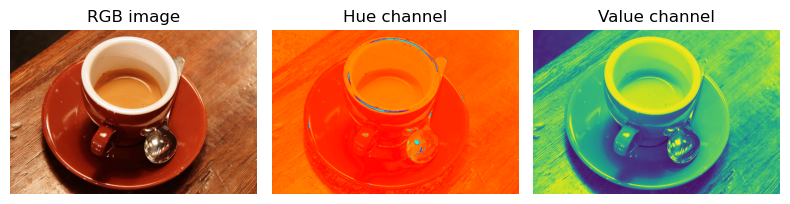

In [3]:
#Write your new example code here.
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hsv

rgb_img = data.coffee()
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

---
## Follow-up Questions

Copy and paste the following questions into the appropriate box in the assignment survey include below and answer them there. (Note: You'll have to fill out the section number and the assignment number and go to the "NEXT" section of the survey to paste in these questions.)

1. Were you able to figure out another command line command for downloading files? If so, what was it?

2. Did you run into any issues with using pip or conda to install packages?

3. Have you already had to install new Python packages previously? If so, what package(s) and what did they allow you to do?

----
# Assignment Wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [4]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mWHXCESRw9" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, you're done with your pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for this assignment's dropbox (Don't forget to add your names in the first cell).

&#169; Copyright 2024,  Department of Computational Mathematics, Science and Engineering at Michigan State University